# Pràctica 1:

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar models de regressió, ficant l'èmfasi en: 
    1. Analitzar els atributs per seleccionar els més representatius i normalitzar-los.
    2. Avaluar correctament l'error del model 
    3. Visualitzar les dades i el model resultant
    4. Saber aplicar el procès de descens del gradient
    
## Avaluació

* apartat C. serà obligatori per aprovar la pràctica 1 (amb un 5.0)
* apartat B. serà opcional i val fins a 3 punts (cal haver fet el apartat C).
* apartat A. serà opcional i val fins a 2 punts (cal haver fet el apartat C i B).

## Material de la pràctica 1

1. Base de dades a Kaggle: https://www.kaggle.com/sabermalek/tapds 
2. Codi d'exemple ('Practica1-Regressio2021.ipynb').
3. Apunts de l'assignatura.
4. Llibreries de python: scikit-learn, numpy, scipy, matplotlib.

## Dataset: Tabriz Air Pollution
<div>
    <img src=images/Tabriz.png width="500">
</div>


Tabriz is the capital city of East Azerbaijan Province, in northwestern Iran. 


# Apartat (C): Analitzant Dades

Hem decidit que el nostre atribut objectiu sigui PM2.5. Explicat amb més detall a l'informe

In [3]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

In [4]:
rahan_csv = pd.read_csv('dataset/Rahan.csv', delimiter=';')
rahan_csv = rahan_csv.iloc[:,:-2]
rahan_csv

Time  air_temperature  dewpoint  wind_direction  \
0      02/19/2017 11:00            -5.42    -13.11          175.38   
1      02/19/2017 12:00            -5.22    -12.25          185.49   
2      02/19/2017 13:00            -4.68    -11.39          189.92   
3      02/19/2017 14:00            -4.10    -10.69          200.58   
4      02/19/2017 15:00            -3.57    -10.70          191.31   
...                 ...              ...       ...             ...   
16388  01/13/2019 07:00            -1.07     -8.77           10.51   
16389  01/13/2019 08:00            -0.72     -8.78          359.97   
16390  01/13/2019 09:00             0.03     -8.80           10.03   
16391  01/13/2019 10:00             1.94     -9.04            3.44   
16392  01/13/2019 11:00             3.97    -10.79          347.98   

       wind_speed ambient_pressure   PM10  PM2.5  
0            0.82           873,97   5.36   1.41  
1            1.52           873,12   5.30   1.51  
2            1.39           872,14   4.39   1.69  
3            1.53           871,56   3.94   1.58  
4            1.50           871,13   3.44   1.50  
...           ...              ...    ...    ...  
16388        1.37              NaN  26.27  12.67  
16389        1.23              NaN  27.69  12.57  
16390        0.72              NaN  29.73  13.39  
16391        1.35              NaN  29.92  13.14  
16392        0.71              NaN  29.08  12.19  

[16393 rows x 8 columns]

In [5]:
abrasan_csv = pd.read_csv('dataset/TabrizPollution/Abrasan.csv', delimiter=';')
abrasan_csv

Time  air_temperature  dewpoint  wind_direction_corr  \
0      02/19/2017 10:30         -9999.00  -9999.00             -9999.00   
1      02/19/2017 11:00         -9999.00  -9999.00             -9999.00   
2      02/19/2017 11:30         -9999.00  -9999.00             -9999.00   
3      02/19/2017 12:00         -9999.00  -9999.00             -9999.00   
4      02/19/2017 12:30         -9999.00  -9999.00             -9999.00   
...                 ...              ...       ...                  ...   
16589  01/13/2019 07:00            -2.30    -10.80                28.57   
16590  01/13/2019 08:00            -1.92    -10.66                29.24   
16591  01/13/2019 09:00            -1.17    -10.25                25.83   
16592  01/13/2019 10:00             0.63    -10.34                26.62   
16593  01/13/2019 11:00             3.81    -11.68                34.52   

       wind_speed  relative_pressure     PM10    PM2.5  
0        -9999.00           -9999.00    77.96    46.47  
1        -9999.00           -9999.00    15.22    14.62  
2        -9999.00           -9999.00     8.68     8.35  
3        -9999.00           -9999.00     6.92     6.70  
4        -9999.00           -9999.00     5.89     5.72  
...           ...                ...      ...      ...  
16589        0.61             853.20 -9999.00 -9999.00  
16590        0.50             853.18 -9999.00 -9999.00  
16591        0.67             853.22 -9999.00 -9999.00  
16592        0.66             852.88 -9999.00 -9999.00  
16593        0.35             852.33 -9999.00 -9999.00  

[16594 rows x 8 columns]

In [6]:
bashumal_csv = pd.read_csv('dataset/TabrizPollution/Bashumal.csv', delimiter=';')
bashumal_csv

Time  air_temperature  dewpoint  wind_direction_corr  \
0      02/20/2017 16:00            -3.09    -11.38               159.43   
1      02/20/2017 16:30            -3.55    -11.83               153.12   
2      02/20/2017 17:00            -3.91    -11.82               146.41   
3      02/20/2017 17:30            -4.29    -11.83               146.60   
4      02/20/2017 18:00            -4.68    -11.79               155.82   
...                 ...              ...       ...                  ...   
15895  01/13/2019 07:00            -1.76    -10.32               211.63   
15896  01/13/2019 08:00            -1.40    -10.32               242.19   
15897  01/13/2019 09:00            -0.72     -9.91                99.04   
15898  01/13/2019 10:00             0.78     -9.97               175.93   
15899  01/13/2019 11:00             3.48    -11.47               128.43   

       wind_speed  relative_pressure    PM10  PM2.5  
0            0.63             865.16  117.46  70.98  
1            0.66             865.37  103.74  62.23  
2            0.76             865.58   98.36  61.13  
3            0.57             865.61  110.39  68.60  
4            0.52             865.53  116.16  73.85  
...           ...                ...     ...    ...  
15895        0.06             856.24   26.23  18.02  
15896        0.03             856.24   76.50  25.94  
15897        0.02             856.30   43.97  23.03  
15898        0.09             855.97   42.24  24.54  
15899        0.08             855.47   46.54  21.33  

[15900 rows x 8 columns]

In [7]:
rastakucha_csv = pd.read_csv('dataset/TabrizPollution/RastaKucha.csv', delimiter=';')
rastakucha_csv

Time  air_temperature  dewpoint  wind_direction_corr  \
0      02/21/2017 16:00         -9999.00  -9999.00             -9999.00   
1      02/21/2017 16:30            -2.21     -7.48               348.55   
2      02/21/2017 17:00            -2.19     -7.38                 4.20   
3      02/21/2017 17:30            -2.44     -7.74               356.88   
4      02/21/2017 18:00            -2.53     -7.78                24.99   
...                 ...              ...       ...                  ...   
16463  01/13/2019 06:00            -1.69    -10.26               113.89   
16464  01/13/2019 07:00            -1.35    -10.62               153.70   
16465  01/13/2019 08:00            -1.05    -10.45               113.83   
16466  01/13/2019 09:00            -0.46    -10.02                84.53   
16467  01/13/2019 10:00             1.80     -9.99                86.44   

       wind_speed  relative_pressure     PM10    PM2.5  
0        -9999.00           -9999.00 -9999.00 -9999.00  
1            0.34             861.30    38.29    36.22  
2            0.44             861.45    38.97    37.52  
3            0.35             861.48 -9999.00 -9999.00  
4            0.13             861.31 -9999.00 -9999.00  
...           ...                ...      ...      ...  
16463        0.44             858.13    41.42    32.55  
16464        0.53             857.90    41.56    27.67  
16465        0.18             857.91    49.78    31.70  
16466        0.22             857.96    53.08    35.07  
16467        0.53             857.60    55.92    35.13  

[16468 rows x 8 columns]

In [6]:
#data = pd.concat([rahan_csv, abrasan_csv, bashumal_csv, rastakucha_csv])
#data

In [8]:
data = pd.concat([abrasan_csv, bashumal_csv, rastakucha_csv], ignore_index=True)
data

Time  air_temperature  dewpoint  wind_direction_corr  \
0      02/19/2017 10:30         -9999.00  -9999.00             -9999.00   
1      02/19/2017 11:00         -9999.00  -9999.00             -9999.00   
2      02/19/2017 11:30         -9999.00  -9999.00             -9999.00   
3      02/19/2017 12:00         -9999.00  -9999.00             -9999.00   
4      02/19/2017 12:30         -9999.00  -9999.00             -9999.00   
...                 ...              ...       ...                  ...   
48957  01/13/2019 06:00            -1.69    -10.26               113.89   
48958  01/13/2019 07:00            -1.35    -10.62               153.70   
48959  01/13/2019 08:00            -1.05    -10.45               113.83   
48960  01/13/2019 09:00            -0.46    -10.02                84.53   
48961  01/13/2019 10:00             1.80     -9.99                86.44   

       wind_speed  relative_pressure   PM10  PM2.5  
0        -9999.00           -9999.00  77.96  46.47  
1        -9999.00           -9999.00  15.22  14.62  
2        -9999.00           -9999.00   8.68   8.35  
3        -9999.00           -9999.00   6.92   6.70  
4        -9999.00           -9999.00   5.89   5.72  
...           ...                ...    ...    ...  
48957        0.44             858.13  41.42  32.55  
48958        0.53             857.90  41.56  27.67  
48959        0.18             857.91  49.78  31.70  
48960        0.22             857.96  53.08  35.07  
48961        0.53             857.60  55.92  35.13  

[48962 rows x 8 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48962 entries, 0 to 48961
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 48962 non-null  object 
 1   air_temperature      48962 non-null  float64
 2   dewpoint             48962 non-null  float64
 3   wind_direction_corr  48962 non-null  float64
 4   wind_speed           48962 non-null  float64
 5   relative_pressure    48962 non-null  float64
 6   PM10                 48962 non-null  float64
 7   PM2.5                48962 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.0+ MB


In [10]:
data.describe()

air_temperature      dewpoint  wind_direction_corr    wind_speed  \
count     48962.000000  48962.000000         48962.000000  48962.000000   
mean        -48.641823    -62.397421            56.498420    -63.514204   
std         800.761921    798.333925           822.654039    798.226238   
min       -9999.000000  -9999.000000         -9999.000000  -9999.000000   
25%           7.510000     -2.270000            35.270000      0.190000   
50%          15.070000      1.580000           100.895000      0.410000   
75%          23.410000      5.840000           173.417500      0.820000   
max          41.180000     15.290000           359.990000      4.780000   

       relative_pressure          PM10         PM2.5  
count       48962.000000  48962.000000  48962.000000  
mean          789.289590  -1057.925704  -1089.109561  
std           866.753414   3157.658804   3146.215129  
min         -9999.000000  -9999.000000  -9999.000000  
25%           855.590000     20.510000      9.540000  
50%           858.800000     40.025000     15.020000  
75%           862.070000     65.180000     24.540000  
max           875.230000   1999.230000    253.220000

In [11]:
df = data[(data['air_temperature'] != -9999.0) & (data['dewpoint'] != -9999.0) & (data['wind_direction_corr'] != -9999.0) & 
            (data['wind_speed'] != -9999.0) & (data['relative_pressure'] != -9999.0) & (data['PM10'] != -9999.0) & 
            (data['PM2.5'] != -9999.0)]
df.describe()

air_temperature      dewpoint  wind_direction_corr    wind_speed  \
count     43281.000000  43281.000000         43281.000000  43281.000000   
mean         15.695477      1.584309           130.297285      0.570703   
std           9.850558      5.378677            97.953231      0.549497   
min         -10.080000    -25.740000             0.000000      0.000000   
25%           7.640000     -2.370000            37.980000      0.190000   
50%          15.010000      1.460000           114.380000      0.400000   
75%          23.310000      5.700000           178.160000      0.770000   
max          41.180000     15.290000           359.990000      4.780000   

       relative_pressure          PM10         PM2.5  
count       43281.000000  43281.000000  43281.000000  
mean          859.118807     56.865056     21.688543  
std             4.591242     58.128905     17.281986  
min           842.350000      0.000000      0.000000  
25%           855.880000     27.330000     11.370000  
50%           858.970000     44.500000     16.490000  
75%           862.300000     69.220000     26.240000  
max           875.230000   1999.230000    253.220000

In [11]:
#df[df.index.duplicated()]
#df = df[~df.index.duplicated()]

<Figure size 432x288 with 0 Axes>

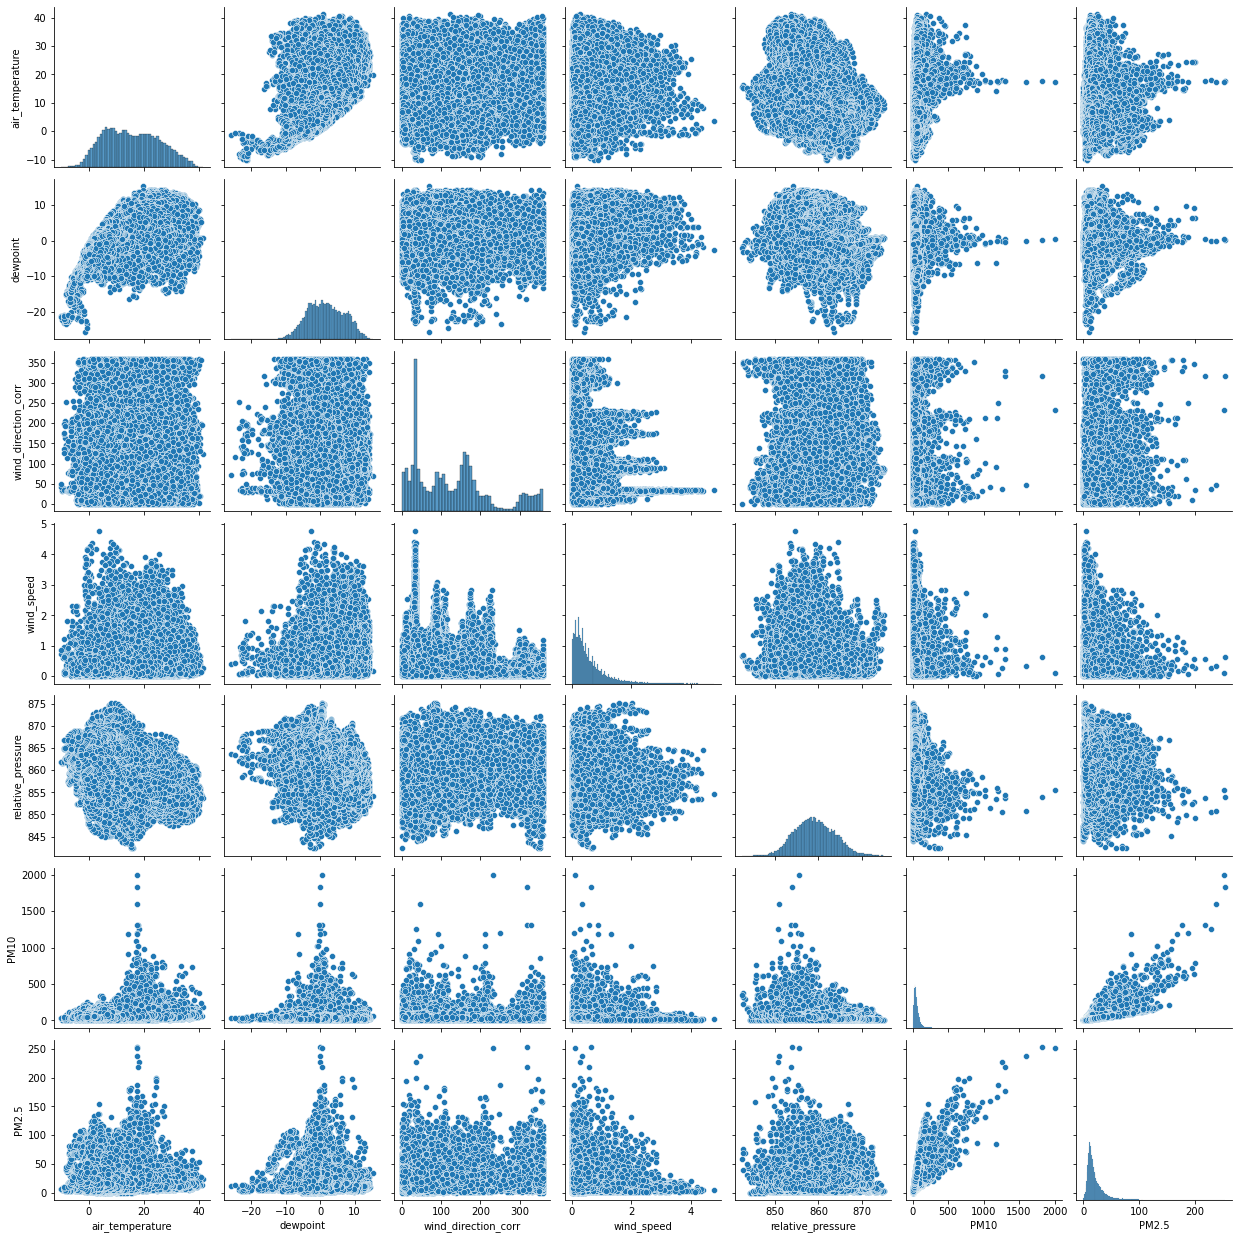

<Figure size 432x288 with 0 Axes>

In [12]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df)
plt.figure()

<IPython.core.display.Javascript object>


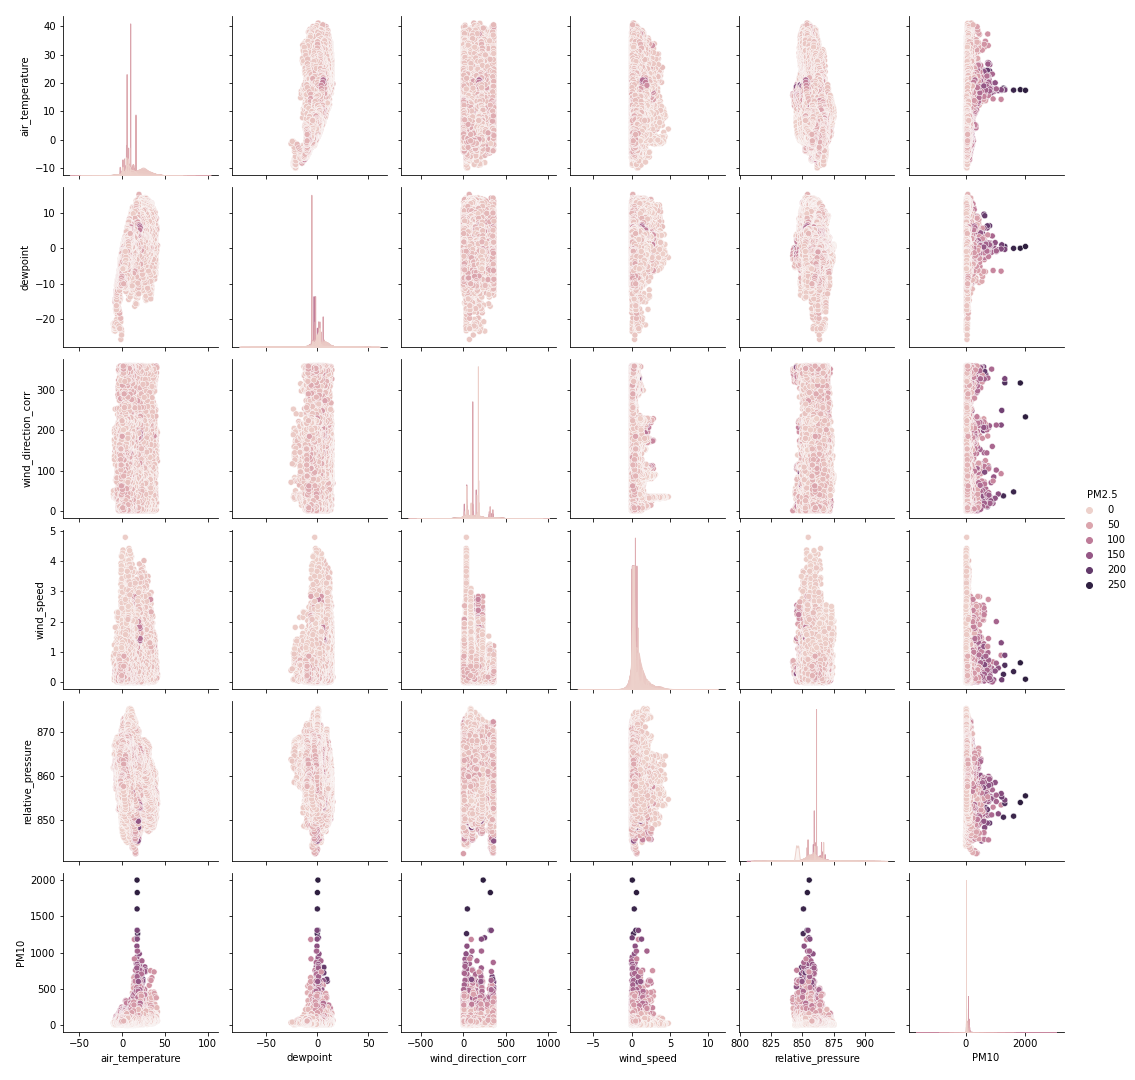

<IPython.core.display.Javascript object>


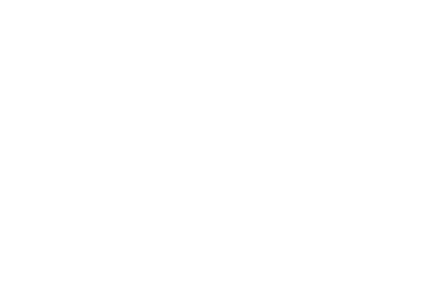

<IPython.core.display.Javascript object>


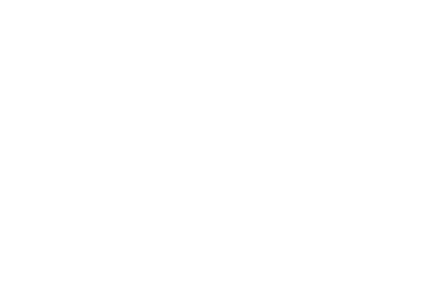

In [24]:
sns.pairplot(df, hue='PM2.5')
plt.figure()

In [12]:
from sklearn import preprocessing as pp
df = df.drop('Time', axis=1)
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df


air_temperature  dewpoint  wind_direction_corr  wind_speed  \
175           0.187671  0.414818             0.028556    0.092050   
176           0.199376  0.429442             0.060974    0.087866   
177           0.222591  0.446259             0.001278    0.104603   
178           0.242879  0.469900             0.044362    0.075314   
179           0.246976  0.460395             0.064585    0.146444   
...                ...       ...                  ...         ...   
48957         0.163675  0.377285             0.316370    0.092050   
48958         0.170308  0.368511             0.426956    0.110879   
48959         0.176161  0.372654             0.316203    0.037657   
48960         0.187671  0.383134             0.234812    0.046025   
48961         0.231760  0.383865             0.240118    0.110879   

       relative_pressure      PM10     PM2.5  
175             0.454684  0.123608  0.372838  
176             0.453771  0.091280  0.311231  
177             0.454075  0.090020  0.312456  
178             0.453467  0.067676  0.284022  
179             0.440389  0.057912  0.257405  
...                  ...       ...       ...  
48957           0.479927  0.020718  0.128544  
48958           0.472932  0.020788  0.109273  
48959           0.473236  0.024900  0.125188  
48960           0.474757  0.026550  0.138496  
48961           0.463808  0.027971  0.138733  

[43281 rows x 7 columns]

<IPython.core.display.Javascript object>


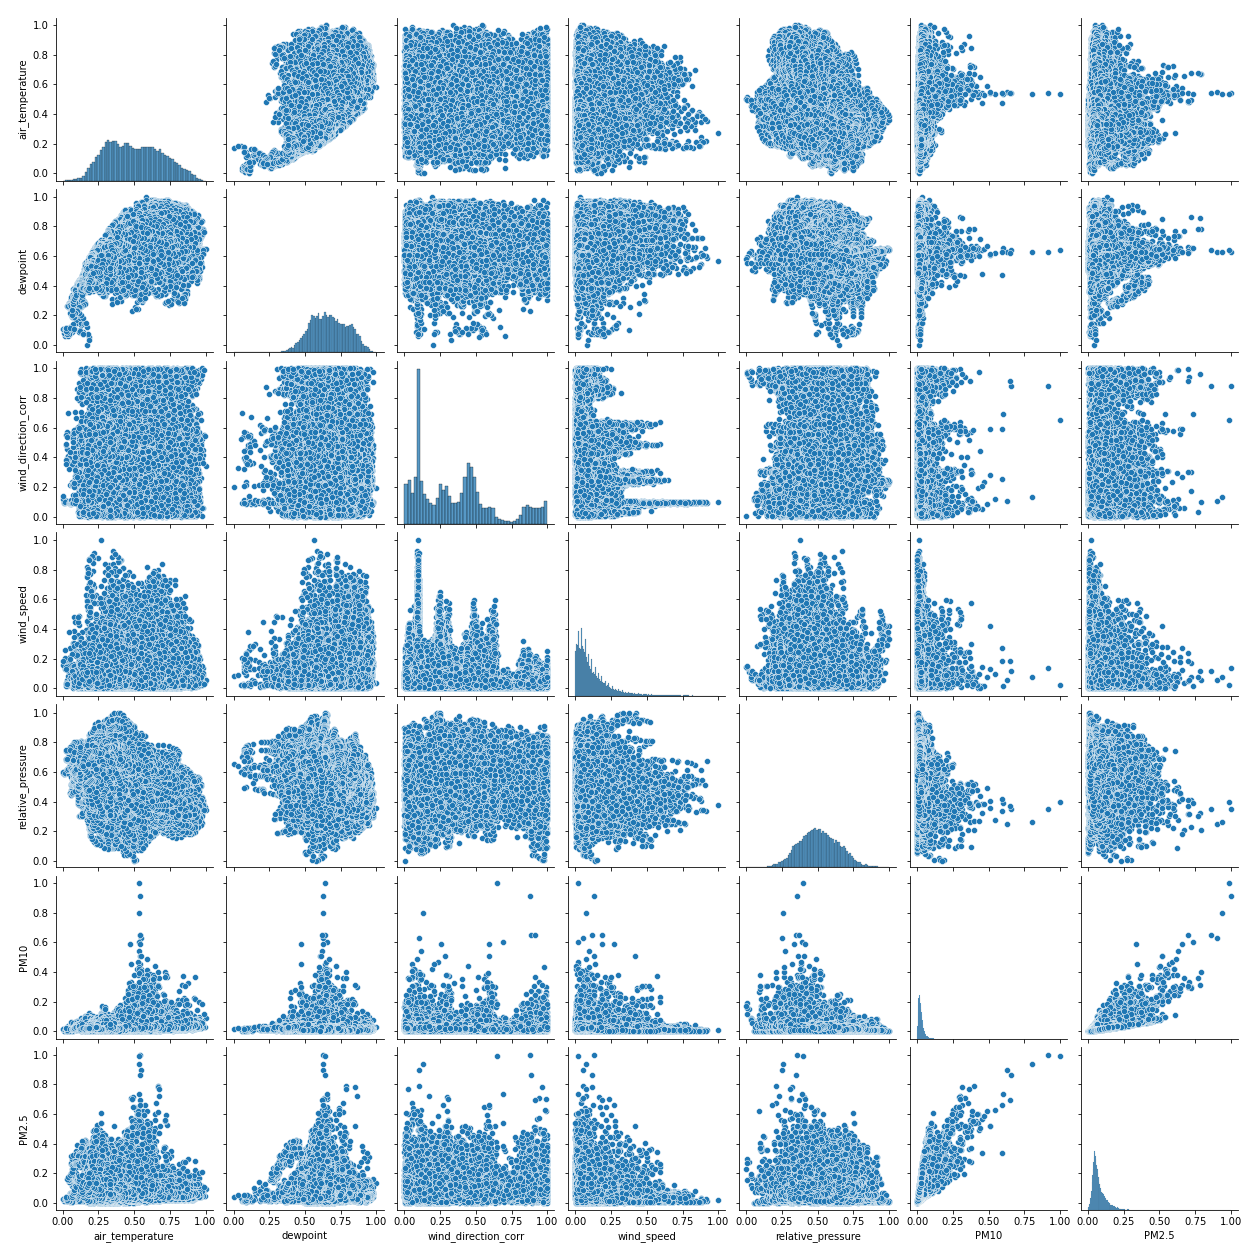

<IPython.core.display.Javascript object>


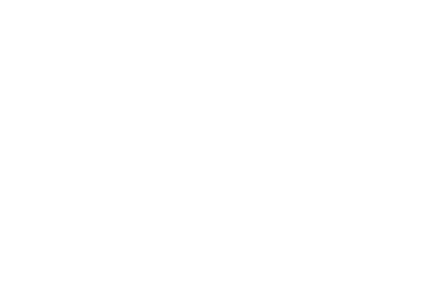

<IPython.core.display.Javascript object>


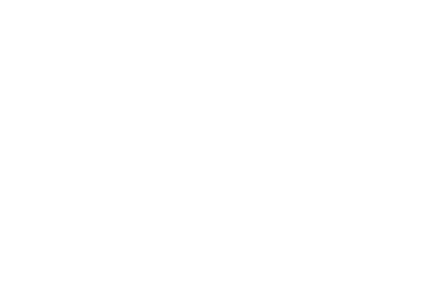

In [64]:
sns.pairplot(normalized_df)
plt.figure()

<IPython.core.display.Javascript object>


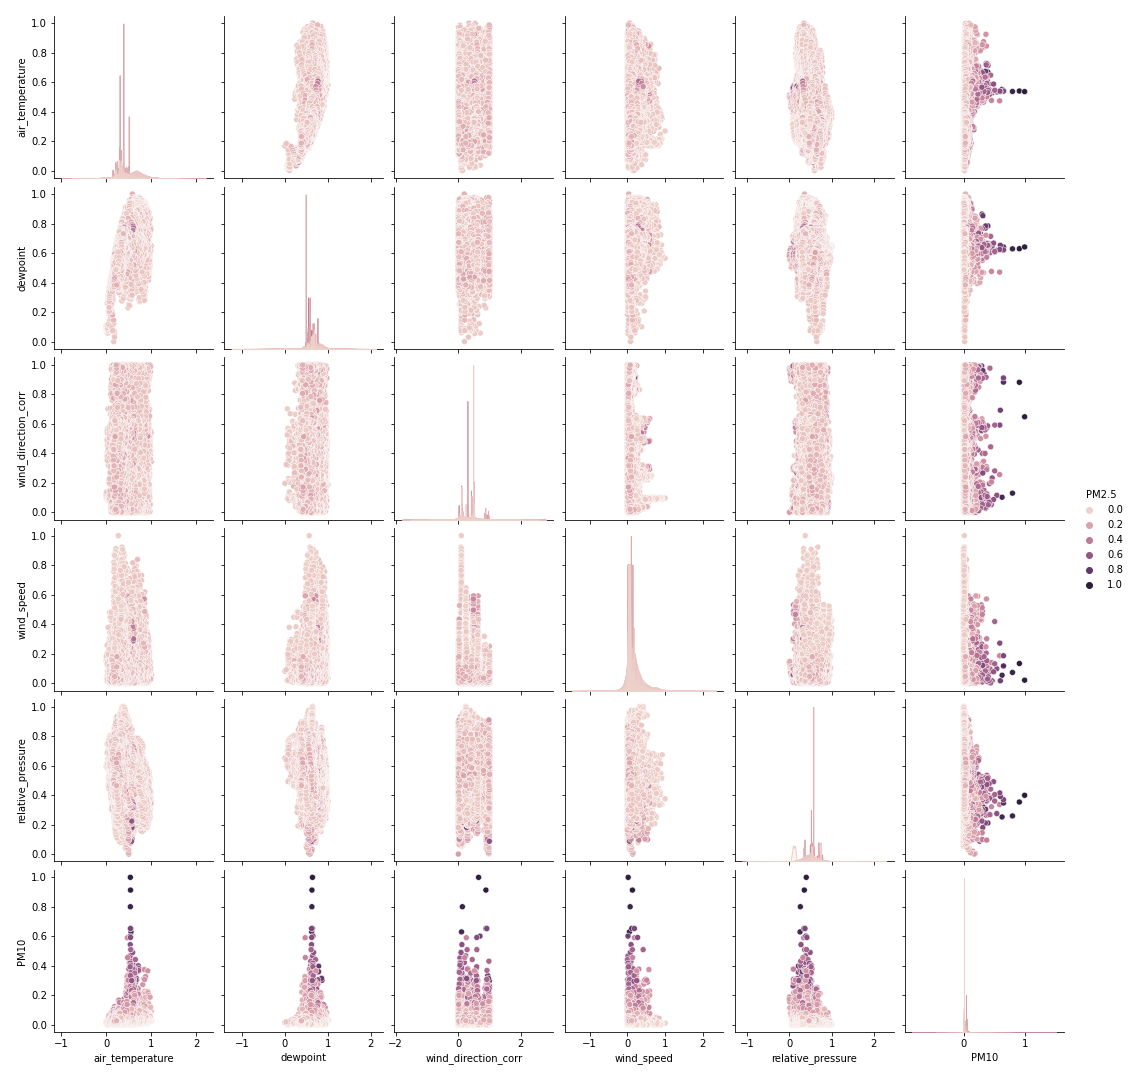

<IPython.core.display.Javascript object>


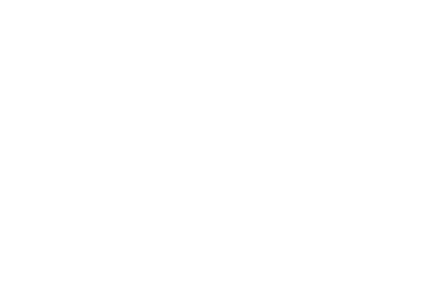

<IPython.core.display.Javascript object>


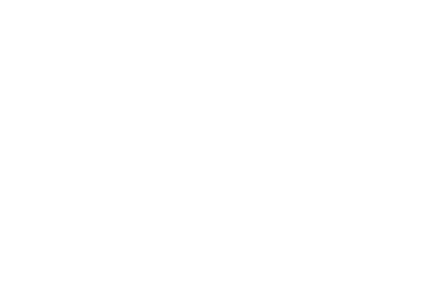

In [65]:
sns.pairplot(normalized_df, hue='PM2.5')
plt.figure()

# Apartat (B): Primeres regressions

Primer, declarem totes les funcions que necessitarem per aquest apartat:

In [13]:
from sklearn.linear_model import LinearRegression

def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t


""" Per a assegurar-nos que el model s'ajusta be a dades noves, no vistes, 
cal evaluar-lo en un conjunt de validacio (i un altre de test en situacions reals).
Com que en aquest cas no en tenim, el generarem separant les dades en 
un 80% d'entrenament i un 20% de validació.
"""
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:]
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

El primer que farem serà estandaritzar les dades i veure quines d'aquestes tenen una distribució més semblant a la normal. Podrem descartar aquells atributs que més s'allunyin d'una distribució normal.

In [14]:
standarized_df = standarize(df)
standarized_df

C:\Users\franm\AppData\Local\Temp/ipykernel_22344/2846583055.py:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_t = x_train - mean[None, :]
C:\Users\franm\AppData\Local\Temp/ipykernel_22344/2846583055.py:28: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_t /= std[None, :]


air_temperature  dewpoint  wind_direction_corr  wind_speed  \
175          -1.640057 -1.915770            -1.225251   -0.237859   
176          -1.579147 -1.804219            -1.106112   -0.274256   
177          -1.458342 -1.675934            -1.325503   -0.128669   
178          -1.352764 -1.495592            -1.167162   -0.383447   
179          -1.331445 -1.568101            -1.092841    0.235300   
...                ...       ...                  ...         ...   
48957        -1.764923 -2.202086            -0.167501   -0.237859   
48958        -1.730407 -2.269017             0.238917   -0.074073   
48959        -1.699952 -2.237411            -0.168114   -0.711019   
48960        -1.640057 -2.157465            -0.467236   -0.638225   
48961        -1.410628 -2.151888            -0.447737   -0.074073   

       relative_pressure      PM10     PM2.5  
175            -0.396147  3.272983  4.207934  
176            -0.402681  2.161144  3.305260  
177            -0.400503  2.117792  3.323198  
178            -0.404859  1.349328  2.906579  
179            -0.498516  1.013522  2.516577  
...                  ...       ...       ...  
48957          -0.215368 -0.265704  0.628484  
48958          -0.265463 -0.263295  0.346109  
48959          -0.263285 -0.121885  0.579300  
48960          -0.252395 -0.065115  0.774301  
48961          -0.330805 -0.016258  0.777773  

[43281 rows x 7 columns]

<IPython.core.display.Javascript object>


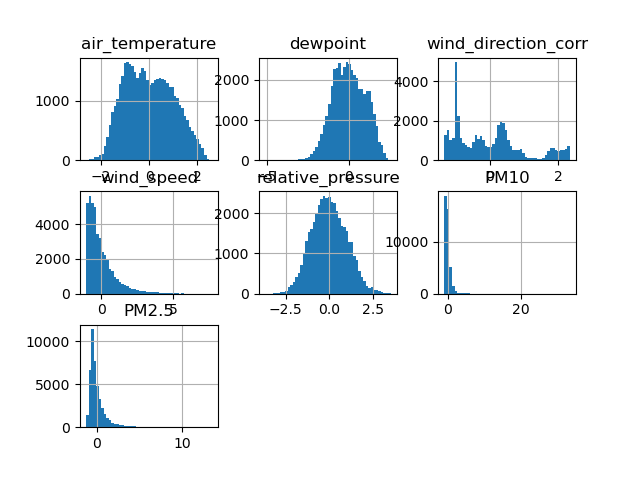

array([[<AxesSubplot:title={'center':'air_temperature'}>,
        <AxesSubplot:title={'center':'dewpoint'}>,
        <AxesSubplot:title={'center':'wind_direction_corr'}>],
       [<AxesSubplot:title={'center':'wind_speed'}>,
        <AxesSubplot:title={'center':'relative_pressure'}>,
        <AxesSubplot:title={'center':'PM10'}>],
       [<AxesSubplot:title={'center':'PM2.5'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

In [15]:
standarized_df.hist(bins=50)

Com veiem, l'atribut que podem descartar amb seguretat per la seva no normalitat és wind_direction_corr.

In [16]:
standarized_df = standarized_df.drop('wind_direction_corr', axis=1)
standarized_df

air_temperature  dewpoint  wind_speed  relative_pressure      PM10  \
175          -1.640057 -1.915770   -0.237859          -0.396147  3.272983   
176          -1.579147 -1.804219   -0.274256          -0.402681  2.161144   
177          -1.458342 -1.675934   -0.128669          -0.400503  2.117792   
178          -1.352764 -1.495592   -0.383447          -0.404859  1.349328   
179          -1.331445 -1.568101    0.235300          -0.498516  1.013522   
...                ...       ...         ...                ...       ...   
48957        -1.764923 -2.202086   -0.237859          -0.215368 -0.265704   
48958        -1.730407 -2.269017   -0.074073          -0.265463 -0.263295   
48959        -1.699952 -2.237411   -0.711019          -0.263285 -0.121885   
48960        -1.640057 -2.157465   -0.638225          -0.252395 -0.065115   
48961        -1.410628 -2.151888   -0.074073          -0.330805 -0.016258   

          PM2.5  
175    4.207934  
176    3.305260  
177    3.323198  
178    2.906579  
179    2.516577  
...         ...  
48957  0.628484  
48958  0.346109  
48959  0.579300  
48960  0.774301  
48961  0.777773  

[43281 rows x 6 columns]

Separem les dades entre l'atribut a predir i la resta i fem la regresió lineal. Per ara no és visualitzable per l'alta quantitat de dimensions.

In [17]:
from sklearn.metrics import r2_score

x = standarized_df.values[:, :5]
y = standarized_df.values[:, 5]

regr = regression(x, y)
predicted = regr.predict(x)

MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

Mean squeared error:  0.3006009912034022
R2 score:  0.699392063302346


Ara podem mirar les regressions lineals gràficament per a cadascun dels atributs.

<IPython.core.display.Javascript object>


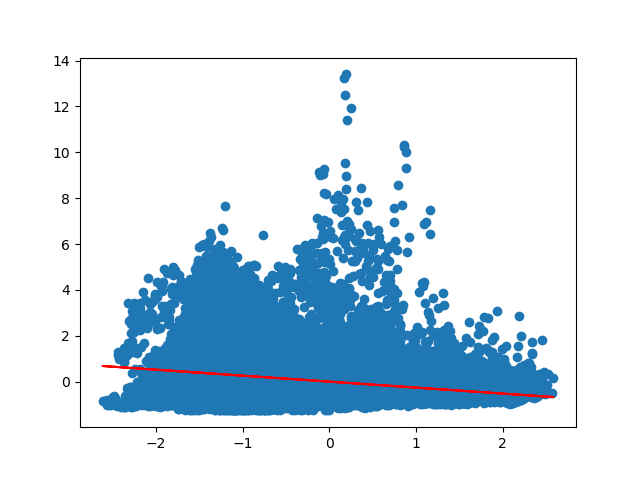

<IPython.core.display.Javascript object>


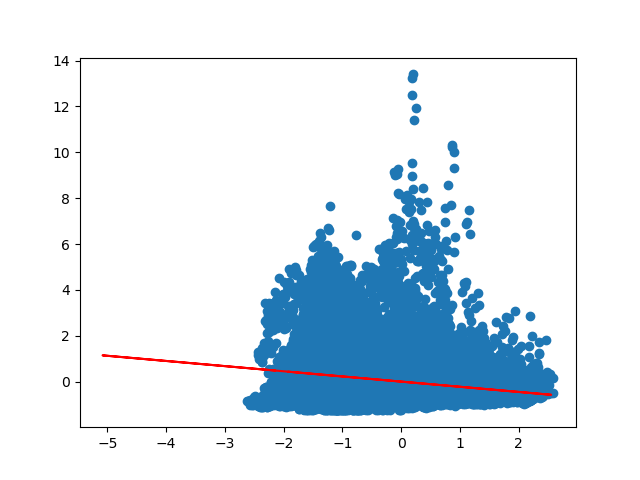

<IPython.core.display.Javascript object>


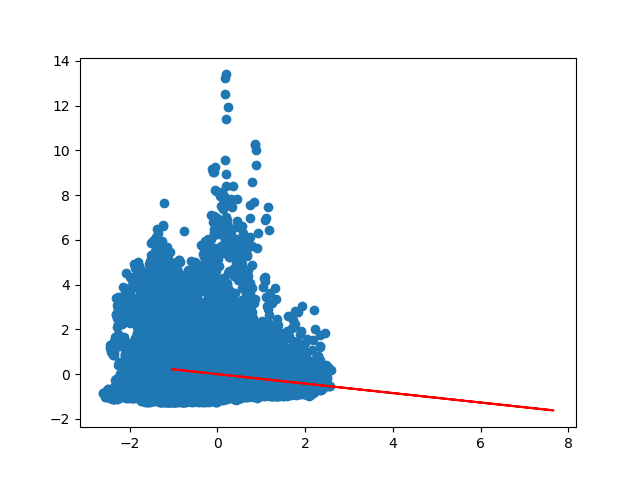

<IPython.core.display.Javascript object>


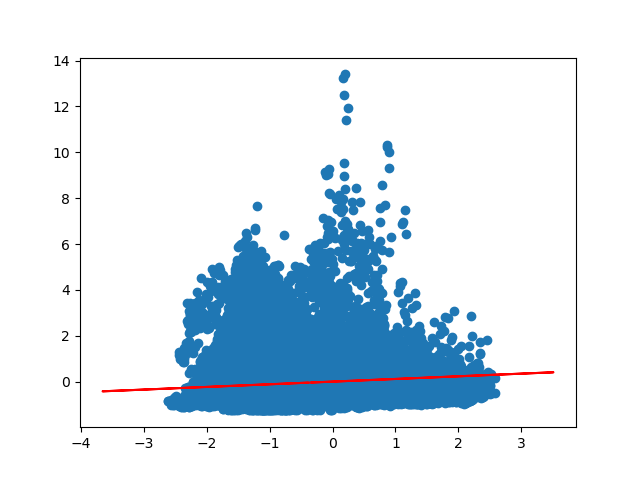

<IPython.core.display.Javascript object>


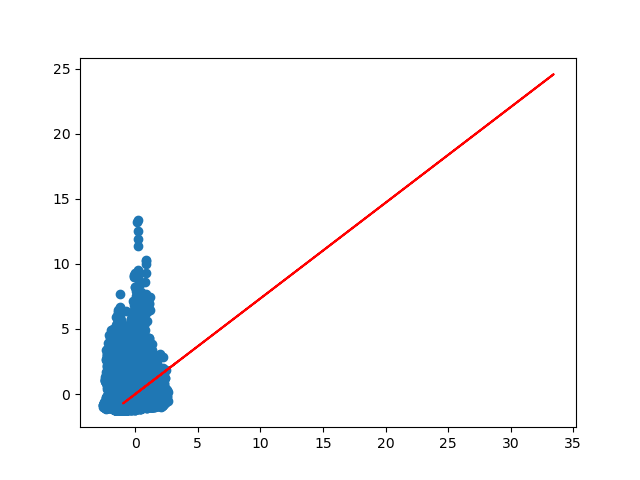

In [18]:
for i in range(0, x.shape[1]):
    atribut = x[:,i].reshape(x.shape[0], 1)
    regr = regression(atribut, y)
    predicted = regr.predict(atribut)

    # Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
    plt.figure()
    ax = plt.scatter(x[:,0], y)
    plt.plot(atribut[:,0], predicted, 'r')

Ara mirarem de manera independent la idoneitat de cadascun dels atributs per fer la regressió lineal.

In [26]:
# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(standarized_df.values[:, :5], standarized_df.values[:, 5])

for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    print("Error en atribut %s: %f" %(standarized_df.columns[i], error))
    print("R2 score en atribut %s: %f" %(standarized_df.columns[i], r2))

Error en atribut air_temperature: 1.017480
R2 score en atribut air_temperature: 0.060330
Error en atribut dewpoint: 1.026754
R2 score en atribut dewpoint: 0.051765
Error en atribut wind_speed: 1.034902
R2 score en atribut wind_speed: 0.044240
Error en atribut relative_pressure: 1.073301
R2 score en atribut relative_pressure: 0.008778
Error en atribut PM10: 0.478398
R2 score en atribut PM10: 0.558186


També podem fer un PCA per veure quants atributs ens retorna. 

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components='mle')
x_train = pca.fit_transform(x)
print(x_train.shape[1])

4
